# 2.1. Problem Statement: Numpy

In [2]:
"""
Write a function so that the columns of the output matrix are powers of the
input vector.
"""
import numpy as np
def getvandermonde(a):
    matrix = np.array(a) #Converting user entered list to matrix.
    length = len(matrix) #Finding the length of the matrix
    output = np.zeros((length,length),dtype = int) # Creating output matrix with zeros along with the length of the matrix.
    for i in range(0,length):# Row index from 0 to length
        for j in range(0,length): #column index from 0 to length
            power=1 #Assigning the power value to 1
            for k in range(0,i):
                power = power*matrix[j] # calculating the power
            output[j,length-i-1] = power #  Filling the last column 
    return output

In [3]:
getvandermonde([1,2,4,5])

array([[  1,   1,   1,   1],
       [  8,   4,   2,   1],
       [ 64,  16,   4,   1],
       [125,  25,   5,   1]])

In [4]:
"""
Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.
"""
a = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
def getmovingaverage(matrix,k):
    length = len(matrix) #finding the length of the matrix
    output = [] #Assigning the output to empty list
    for i in range(0,length): # repeating the loop from 0 to length
        sum = 0
        if (i + k > length):
            break
        for j in range(0,k): # repeating the loop from 0 to window size.
            sum = sum + matrix[i+j]
        avg = sum / k
        output.append(avg)
    return output



In [5]:
getmovingaverage(a,3)

[5.0,
 4.666666666666667,
 5.666666666666667,
 6.666666666666667,
 9.666666666666666,
 28.666666666666668,
 49.333333333333336,
 72.66666666666667,
 84.0,
 93.33333333333333,
 116.33333333333333]

# 2.2. Problem Statement: Pandas

# Problem Statement 1:

In [7]:
'''
1) How-to-count-distance-to-the-previous-zero
'''
import pandas as pd
X = [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]
temp = 0
Y = []
for i in X:
    if(i == 0):
        temp = 0
    else:
        temp = temp + 1
    Y.append(temp)
print(Y)


[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]


In [8]:
df = pd.DataFrame({'X':X,'Y':Y})
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [10]:
"""
2)Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.
"""
dt_Index = pd.date_range(start='01-01-2015', end='31-12-2015',freq = 'B')
s = pd.Series(np.random.rand(len(dt_Index)),index = dt_Index )
s

2015-01-01    0.437271
2015-01-02    0.826131
2015-01-05    0.035450
2015-01-06    0.578836
2015-01-07    0.706110
2015-01-08    0.624453
2015-01-09    0.187869
2015-01-12    0.687297
2015-01-13    0.921846
2015-01-14    0.095476
2015-01-15    0.956047
2015-01-16    0.289889
2015-01-19    0.909322
2015-01-20    0.684442
2015-01-21    0.916560
2015-01-22    0.101063
2015-01-23    0.592736
2015-01-26    0.819115
2015-01-27    0.444467
2015-01-28    0.405111
2015-01-29    0.203096
2015-01-30    0.786505
2015-02-02    0.890455
2015-02-03    0.024104
2015-02-04    0.775708
2015-02-05    0.322006
2015-02-06    0.563508
2015-02-09    0.719355
2015-02-10    0.877252
2015-02-11    0.225992
                ...   
2015-11-20    0.808922
2015-11-23    0.750188
2015-11-24    0.811242
2015-11-25    0.388330
2015-11-26    0.472766
2015-11-27    0.479669
2015-11-30    0.604859
2015-12-01    0.808981
2015-12-02    0.870543
2015-12-03    0.564260
2015-12-04    0.858610
2015-12-07    0.003917
2015-12-08 

In [11]:
"""
3) Find the sum of the values in s for every Wednesday
"""
s[s.index.weekday == 2].sum()


29.855116982742814

In [12]:
"""
4) Average For each calendar month
"""
s.resample('M',how='mean')


C:\Users\Dikshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


2015-01-31    0.554959
2015-02-28    0.542661
2015-03-31    0.492023
2015-04-30    0.511745
2015-05-31    0.478718
2015-06-30    0.479251
2015-07-31    0.433289
2015-08-31    0.465115
2015-09-30    0.520343
2015-10-31    0.611560
2015-11-30    0.585594
2015-12-31    0.437942
Freq: M, dtype: float64

In [13]:
"""
5)For each group of four consecutive calendar months in s, find the date on which the highest
value occurred.
"""
s.groupby(pd.Grouper(freq='4m')).idxmax()


2015-01-31   2015-01-15
2015-05-31   2015-05-01
2015-09-30   2015-07-21
2016-01-31   2015-10-14
dtype: datetime64[ns]

# Problem Statement 2:

In [17]:
"""
Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam
es_right.csv
"""
df1_BabyNames = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")


         Unnamed: 0       Id       Name  Year Gender State  Count
0             11349    11350       Emma  2004      F    AK     62
1             11350    11351    Madison  2004      F    AK     48
2             11351    11352     Hannah  2004      F    AK     46
3             11352    11353      Grace  2004      F    AK     44
4             11353    11354      Emily  2004      F    AK     41
5             11354    11355    Abigail  2004      F    AK     37
6             11355    11356     Olivia  2004      F    AK     33
7             11356    11357   Isabella  2004      F    AK     30
8             11357    11358     Alyssa  2004      F    AK     29
9             11358    11359     Sophia  2004      F    AK     28
10            11359    11360     Alexis  2004      F    AK     27
11            11360    11361  Elizabeth  2004      F    AK     27
12            11361    11362     Hailey  2004      F    AK     27
13            11362    11363       Anna  2004      F    AK     26
14        

In [18]:
# 1) Delete unnamed columns
del df1_BabyNames['Unnamed: 0']

In [19]:
# 2)Show the distribution of male and female
df1_BabyNames['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [20]:
# 3)Show the top 5 most preferred names
name_count = df1_BabyNames['Name'].value_counts()
name_count.head()

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [21]:
# 4)What is the median name occurrence in the dataset

median_id = df1_BabyNames.Id.median()
medianName = df1_BabyNames[df1_BabyNames['Id'] == median_id]
print(medianName)

             Id   Name  Year Gender State  Count
508197  2811921  Kasey  2010      F    MO      6


In [22]:
# 5)Distribution of male and female born count by states

df1_BabyNames.groupby(['State','Gender']).count()


Id   Name   Year  Count
State Gender                            
AK    F        2404   2404   2404   2404
      M        2587   2587   2587   2587
AL    F        9878   9878   9878   9878
      M        8419   8419   8419   8419
AR    F        7171   7171   7171   7171
      M        6475   6475   6475   6475
AZ    F       14518  14518  14518  14518
      M       10820  10820  10820  10820
CA    F       45144  45144  45144  45144
      M       31637  31637  31637  31637
CO    F       11424  11424  11424  11424
      M        9183   9183   9183   9183
CT    F        6575   6575   6575   6575
      M        5733   5733   5733   5733
DC    F        3053   3053   3053   3053
      M        3000   3000   3000   3000
DE    F        2549   2549   2549   2549
      M        2440   2440   2440   2440
FL    F       25781  25781  25781  25781
      M       20070  20070  20070  20070
GA    F       19385  19385  19385  19385
      M       15454  15454  15454  15454
HI    F        3255   3255   3255   3255
      M        3546   3546   3546   3546
IA    F        7131   7131   7131   7131
      M        6307   6307   6307   6307
ID    F        4918   4918   4918   4918
      M        4833   4833   4833   4833
IL    F       21268  21268  21268  21268
      M       16828  16828  16828  16828
...             ...    ...    ...    ...
OK    F        9519   9519   9519   9519
      M        8138   8138   8138   8138
OR    F        8604   8604   8604   8604
      M        7333   7333   7333   7333
PA    F       17480  17480  17480  17480
      M       14171  14171  14171  14171
RI    F        2558   2558   2558   2558
      M        2468   2468   2468   2468
SC    F        9465   9465   9465   9465
      M        8195   8195   8195   8195
SD    F        2838   2838   2838   2838
      M        2908   2908   2908   2908
TN    F       13063  13063  13063  13063
      M       10588  10588  10588  10588
TX    F       39760  39760  39760  39760
      M       27791  27791  27791  27791
UT    F        9515   9515   9515   9515
      M        8233   8233   8233   8233
VA    F       14759  14759  14759  14759
      M       11997  11997  11997  11997
VT    F        1398   1398   1398   1398
      M        1618   1618   1618   1618
WA    F       13329  13329  13329  13329
      M       11049  11049  11049  11049
WI    F       10549  10549  10549  10549
      M        8940   8940   8940   8940
WV    F        4305   4305   4305   4305
      M        3733   3733   3733   3733
WY    F        1456   1456   1456   1456
      M        1904   1904   1904   1904

[102 rows x 4 columns]

# 2.3. Problem Statement: Use Cases on Numpy and Pandas

In [23]:
"""1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:
"""
import sys
randomList = ['a',0,5]
for i in randomList:
    try:
        result = 1/i
        print("The entry is :",i)
        print("The reciprocal of i is:", result)
    except: 
        print("The Entry is:",i)
        print("The Error is:", sys.exc_info()[0])



The Entry is: a
The Error is: <class 'TypeError'>
The Entry is: 0
The Error is: <class 'ZeroDivisionError'>
The entry is : 5
The reciprocal of i is: 0.2


In [24]:
"""
2)Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)
"""
l1 =[1,2,3,4]
for i in l1:
    try:
        print("The value of List is ", i )
        if(l1[i] == 5):
            print(l1[5])
    except: 
        print("Array out of bound :",sys.exc_info()[0]) 
    

The value of List is  1
The value of List is  2
The value of List is  3
The value of List is  4
Array out of bound : <class 'IndexError'>


In [25]:
"""
3)Write a python module script that contains fib2() method to calculate the Fibonacci series
till 1000 and save it as fibo.py.
"""
def fib2():
    list = [0,1]
    currentindex =2
    while(True):
        value = list[currentindex-1]+list[currentindex-2]
        if(value>=1000):
            break     
        list.append(list[currentindex-1]+list[currentindex-2])
        currentindex = currentindex+1
    print(list)
# Calling the above function
fib2()

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


In [29]:
"""
4) Write a python module script that contains ispalindrome() method to calculate the input
string as palindrome string or not and save it as palindrome.py.
"""
def ispalindrome():
    string = input("Enter the string:")
    string_reverse = string[::-1]
    print(string_reverse)
    if(string == string_reverse):
        print("Entered string is palindrome")
    else:
        print("Entered string is not palindrome")

ispalindrome()

Enter the string:civic
civic
Entered string is palindrome


In [30]:
ispalindrome()

Enter the string:meaning
gninaem
Entered string is not palindrome


In [32]:
"""
5) Write a program in Python with one class called Cipher. Within the constructor of this
class, ask user for a string and store it. Use a static variable, key to store a randomly
generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt
within this class. Encrypt generates and prints a cipher text using the user-entered string and
the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts
alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher
text can have special characters. Use generator expression to filter out alpha and numeric
characters of the input string and to generate cipher text. Create an instance of this class,
encrypt and decrypt back the user entered string.
"""
class Cipher:
    L2I = dict(zip("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789",range(62)))
    I2L = dict(zip(range(62),"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"))
    
    def __init__(self,Instr=""): 
        self.Instr=str(input("Enter the input string"))
        
    def encrypt(self,key):
        ciphertext = ""
        Instr=self.Instr
        for c in Instr:
            if c.isalnum(): 
                ciphertext += self.I2L[ (self.L2I[c] + key) ]
            else: 
                ciphertext += c
        return ciphertext
    
    def decrypt(self,Enstr,key):
        plaintext2 = ""
        for c in Enstr:
            if c.isalnum(): plaintext2 += self.I2L[ (self.L2I[c] - key)]
            else: plaintext2 += c
        return plaintext2

k=np.random.randint(1,50,1)
key=k[0]
c=Cipher()
encryptstr=c.encrypt(key)
decryptstr=c.decrypt(encryptstr,key)
print("\n Input String is :\t"+c.Instr)
print("\nEncryption vaue of given string is :\t"+encryptstr)

Enter the input stringmagicstick

 Input String is :	magicstick

Encryption vaue of given string is :	sgmoiyzoiq


In [53]:
"""
Get Data from the following link:
http://files.grouplens.org/datasets/movielens/ml-20m.zip
We will be using the following files for this exercise:
ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp
movies.csv : movieId, title, genres
"""
# Read the dataset using pandas.
import pandas as pd
import numpy as np
ratings = pd.read_csv("B:\\Data Science Bootcamp\\ml-20m\\ml-20m\\ratings.csv")


#movies.dtypes

In [54]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [55]:
movies = pd.read_csv("B:/Data Science Bootcamp/ml-20m/ml-20m/movies.csv")
tags = pd.read_csv("B:/Data Science Bootcamp/ml-20m/ml-20m/tags.csv")

In [56]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [58]:
# Extract the first row from tags and print its type
first_row = tags.iloc[0]
type(first_row)

pandas.core.series.Series

In [60]:
#Extract row 0, 11, 2000 from tags DataFrame.
zeroth_row = tags.iloc[0]
zeroth_row



userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object

In [61]:
eleventh_row = tags.iloc[10]
eleventh_row


userId               65
movieId            1694
tag               jesus
timestamp    1368149925
Name: 10, dtype: object

In [62]:
row_2000 = tags.iloc[1999]
row_2000

userId                 910
movieId              68159
tag          Russell Crowe
timestamp       1242236334
Name: 1999, dtype: object

In [67]:
#Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

ratings.mean()
ratings.median()
ratings.min()
ratings.max()
ratings.count()
ratings.std()
ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [68]:
#Filter out ratings with rating > 5
# with rating>5 the empty data will generate.
ratings[ratings['rating'] > 5]


,userId,movieId,rating,timestamp


In [69]:
#Find how many null values, missing values are present. Deal with them. Print out how many rows have been
#modified.
ratings.info()
ratings.isnull().sum()
tags.isnull().sum()# 16 null values are there.
movies.isnull().sum()
tags.dropna() # to drop the null values
tags.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


,userId,movieId,tag,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [70]:
#Filter out movies from the movies DataFrame that are of type 'Animation'.
movie_Animation = movies[(movies['genres'] == 'Animation')]
print(movie_Animation)

       movieId                                              title     genres
2503      2588                                   Cloudland (1998)  Animation
4906      5002                               Fritz the Cat (1972)  Animation
4907      5003            Nine Lives of Fritz the Cat, The (1974)  Animation
9455     27738                    Cathedral, The (Katedra) (2002)  Animation
9989     32840                                     Vincent (1982)  Animation
13444    66335                  Afro Samurai: Resurrection (2009)  Animation
13858    69469                        Garfield's Pet Force (2009)  Animation
14184    71158                Immigrants (L.A. Dolce Vita) (2008)  Animation
14492    72603                            Merry Madagascar (2009)  Animation
14578    72927                                 Donkey Xote (2007)  Animation
14580    72931                                       Tango (1981)  Animation
14876    74486                                       $9.99 (2008)  Animation

In [71]:
#Find the average rating of movies.
ratings.mean()
ratings['rating'].mean()

3.5255285642993797

In [72]:
#Perform an inner join of movies and tags based on movieId.
pd.merge(movies,tags,how='inner',on='movieId')

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2299,Pixar,1403306852
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,animation,1290312028
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,family,1290312032
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,Tom Hanks,1290312036
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6233,Pixar,1387079572


In [73]:
#Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.
movies[(movies['genres'] == 'Comedy') & (ratings['rating']> 4)].head()

C:\Users\Dikshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,movieId,title,genres
142,144,"Brothers McMullen, The (1995)",Comedy
185,187,Party Girl (1995),Comedy
201,203,"To Wong Foo, Thanks for Everything! Julie Newm...",Comedy
220,223,Clerks (1994),Comedy
231,234,Exit to Eden (1994),Comedy


In [80]:
#Split 'genres' into multiple columns.
multiple_columns = movies['genres'].str.split("|", expand = True)
multiple_columns.head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [79]:
#Extract year from title e.g. (1995).
movies['year'] = movies['title'].str[-6:]
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [81]:
#Select rows based on timestamps later than 2015-02-01.
tags["datetime"]=pd.to_datetime(tags["timestamp"],format = None,exact = True)

tags[tags['datetime']>'2015-02-01']


,userId,movieId,tag,timestamp,datetime


In [82]:
#Sort the tags DataFrame based on timestamp.
tags.sort_values(by=['timestamp'])

,userId,movieId,tag,timestamp,datetime
333932,100371,2788,monty python,1135429210,1970-01-01 00:00:01.135429210
333927,100371,1732,coen brothers,1135429236,1970-01-01 00:00:01.135429236
333924,100371,1206,stanley kubrick,1135429248,1970-01-01 00:00:01.135429248
333923,100371,1193,jack nicholson,1135429371,1970-01-01 00:00:01.135429371
333939,100371,5004,peter sellers,1135429399,1970-01-01 00:00:01.135429399
333922,100371,47,morgan freeman,1135429412,1970-01-01 00:00:01.135429412
333921,100371,47,brad pitt,1135429412,1970-01-01 00:00:01.135429412
333936,100371,4011,brad pitt,1135429431,1970-01-01 00:00:01.135429431
333937,100371,4011,guy ritchie,1135429431,1970-01-01 00:00:01.135429431
333920,100371,32,bruce willis,1135429442,1970-01-01 00:00:01.135429442


# 2.4. Problem Statement: Scipy and Matplotlib

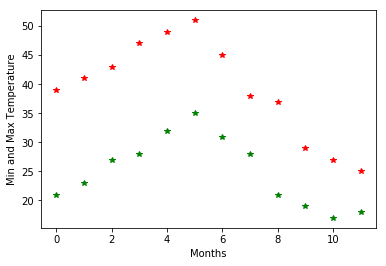

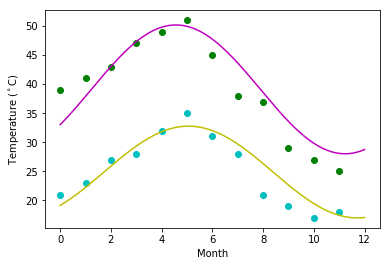

In [108]:
"""
Scipy:
We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
"""
import numpy as np
import pandas as pd
from scipy import optimize
min_temp = np.array([21,23,27,28,32,35,31,28,21,19,17,18])
max_temp = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
import matplotlib.pyplot as plt
%matplotlib inline
months = np.arange(12)
plt.plot(months,max_temp,'r*')
plt.plot(months,min_temp,'g*')
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature')

#Fitting it to a periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temp, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
#Plotting the fit
plt.figure()
plt.plot(months, max_temp, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, min_temp, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

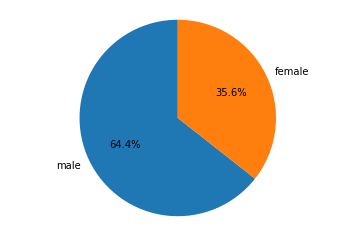

In [84]:
#Create a pie chart presenting the male/female proportion
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
import matplotlib.pyplot as plt

titanic.describe()
titanic.dtypes

proportions = titanic['sex'].value_counts()
proportions
labels='male','female'
sizes = proportions
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()


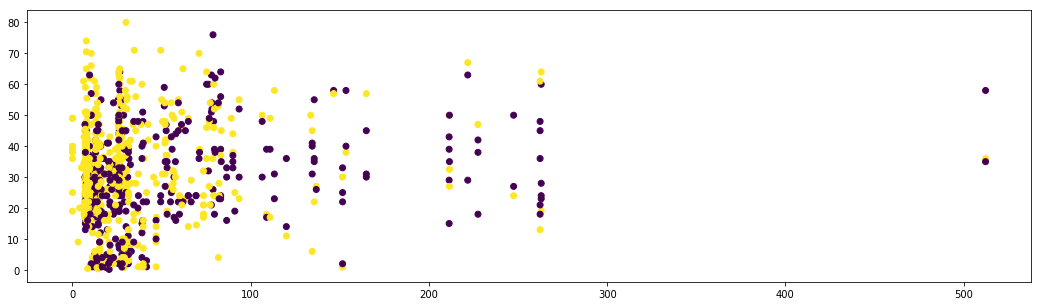

In [85]:
"""
Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
 to find the null values in age and fare column"""
import matplotlib.pyplot as plt
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
plt.figure(figsize=(18,5))
gender = pd.factorize(titanic['sex'])
plt.scatter(titanic.fare,titanic.age,c=gender[0])

titanic.drop(titanic.index[1309],inplace=True)

# 2.5. Problem Statement: Data Cleaning

In [87]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
                'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                            '12. Air France', '"Swiss Air"']})
"""
1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).
"""
df['FlightNumber'] = df['FlightNumber'].apply(lambda x: x+10)
df['FlightNumber'] = df['FlightNumber'].ffill()

df.dtypes
df['FlightNumber'] = df['FlightNumber'].astype('int32')
df.dtypes

From_To         object
FlightNumber     int32
RecentDelays    object
Airline         object
dtype: object

In [88]:
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10055,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10075,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10095,"[67, 32]","""Swiss Air"""


In [90]:
'''2. The From_To column would be better as two separate columns! Split each
string on the underscore delimiter _ to give a new temporary DataFrame with
the correct values. Assign the correct column names to this temporary
DataFrame.
'''
#df['To'] = df['From_To'].str.split('_',expand=True).apply(lambda x:x[0]).head()
Temp_From_To = df['From_To'].str.split('_',expand =True) 
Temp_From_To.columns = ['From', 'To']
Temp_From_To.head()

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [92]:
'''3. Notice how the capitalisation of the city names is all mixed up in this
temporary DataFrame. Standardise the strings so that only the first letter is
uppercase (e.g. "londON" should become "London".)
'''
capitalizer = lambda x: x.capitalize()    
Temp_From_To['From'] = Temp_From_To['From'].apply(capitalizer)
Temp_From_To['To'] = Temp_From_To['To'].apply(capitalizer)
Temp_From_To.head()

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [100]:
df = pd.concat([df,Temp_From_To],axis=1)


In [101]:
df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10055,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10075,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10095,"[67, 32]","""Swiss Air""",Brussels,London


In [102]:
'''
5.In the RecentDelays column, the values have been entered into the
DataFrame as a list. We would like each first value in its own column, each

second value in its own column, and so on. If there isn't an Nth value, the value
should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns
delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df
with delays.
'''
Delays = pd.DataFrame(df['RecentDelays'].values.tolist())
Delays.columns = ['delay_1','delay_2','delay_3']

In [103]:
Delays.head()

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [104]:
# concatinating the two Data Frames(df and Delays)

df = pd.concat([df,Delays],axis = 1)

In [105]:
df.head()

,FlightNumber,RecentDelays,Airline,From,To,delay_1,delay_2,delay_3
0,10055,"[23, 47]",KLM(!),London,Paris,23.0,47.0,NaN
1,10055,[],<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10075,"[24, 43, 87]",(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,[13],12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10095,"[67, 32]","""Swiss Air""",Brussels,London,67.0,32.0,NaN


In [106]:
del df['RecentDelays']

In [107]:
df.head()

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10055,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10075,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10095,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
